# CNN - Convolutional Neural Networks

Convolutional Neural Networks (CNNs) are a class of deep neural networks commonly used for analyzing visual data. They are particularly effective for tasks such as image recognition, object detection, and image segmentation. CNNs have also found applications in natural language processing and other domains.

**Key Components of CNNs**
1. Convolutional Layers:

    - The core building block of a CNN, a convolutional layer applies convolution operations to the input data.
Convolution involves sliding a filter (or kernel) across the input to produce feature maps. This helps in detecting features such as edges, textures, and patterns.
    - The filter's size, stride (step size), and padding (how the filter handles image borders) are crucial parameters.

2. Activation Functions:

    - Activation functions introduce non-linearity into the network, enabling it to learn complex patterns.
    - The most commonly used activation function in CNNs is the Rectified Linear Unit (ReLU), defined as 
ReLU(x)=max(0,x).

3. Pooling Layers:

    - Pooling layers reduce the spatial dimensions (width and height) of the feature maps, keeping the depth intact.
    - This operation reduces the number of parameters, controls overfitting, and makes the model more computationally efficient.
    - Common types of pooling include max pooling (selecting the maximum value in a region) and average pooling (calculating the average value in a region).

4. Fully Connected Layers:

    - After a series of convolutional and pooling layers, the high-level reasoning in the network is done via fully connected (dense) layers.
    - These layers have connections to all activations in the previous layer and typically come at the end of the CNN.

5. Dropout Layers:

    - Dropout is a regularization technique used to prevent overfitting. It involves randomly setting a fraction of input units to 0 at each update during training.

We will learn about the architecture of this while doing an example of the MNIST dataset. The MNIST dataset consists of 60,000 training and 10,000 testing grayscale images of handwritten digits (0-9), each 28x28 pixels, widely used for training and testing image processing systems. For our example, we will be using a smaller version of that dataset.

Let's start by importing libraries and data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv("datasets/mnist_train_small.csv", header=None) # the dataset has no header so we set header=None and later we will add the headers
column_headers = ["label"] + [f"pixel_{i}" for i in range(784)] # we add the headers
train_data.columns = column_headers
train_data.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Here, each pixel is a feature that will be fed into the CNN model while the label is the number those features belong to

Let's check for missing values

In [4]:
train_data.isna().sum()

label        0
pixel_0      0
pixel_1      0
pixel_2      0
pixel_3      0
            ..
pixel_779    0
pixel_780    0
pixel_781    0
pixel_782    0
pixel_783    0
Length: 785, dtype: int64

Let's check the count of each class, it should not be too skewed or it can affect the training

In [5]:
train_data["label"].value_counts()

1    2243
7    2126
6    2039
9    2023
3    2021
2    1989
0    1962
4    1924
8    1912
5    1761
Name: label, dtype: int64

Now, let's visualise how the numbers look by plotting them in a graph along with the label

C:\Users\trail\AppData\Local\Temp\ipykernel_22016\236237935.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, ind+1)


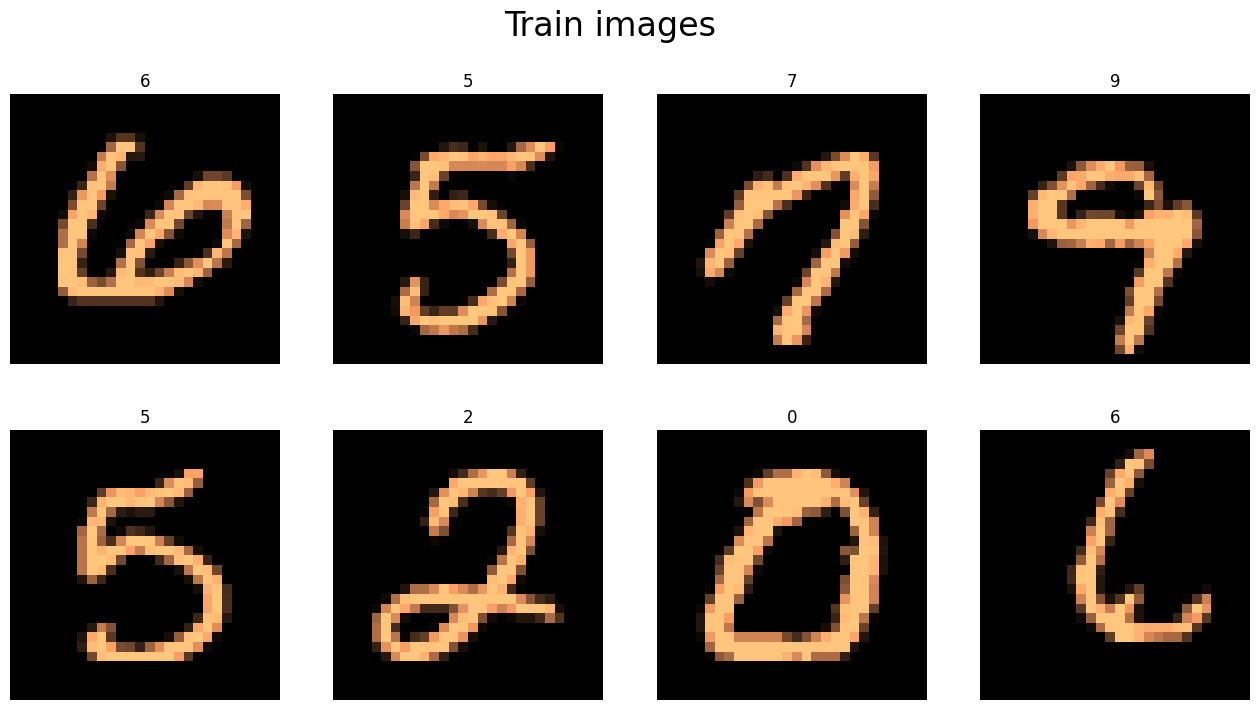

In [12]:
# first few train images with labels
fig, ax = plt.subplots(figsize=(16, 8))
for ind, row in train_data.iloc[:8, :].iterrows():
    plt.subplot(2, 4, ind+1)
    plt.title(row[0])
    img = row.to_numpy()[1:].reshape(28, 28)
    fig.suptitle('Train images', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='copper')

Now, let us split the data into features and labels, our features are gonna be the pixel values and labels will be the number

In [13]:
# split into image and labels and convert to numpy array
X = train_data.iloc[:, 1:].to_numpy() # we are converting the dataframe to numpy array excluding the first column which is the label
y = train_data['label'].to_numpy() # we are converting the label column to numpy array

print(X.shape, y.shape)

(20000, 784) (20000,)


Okay, so we have 20000 examples and each example has a size of 784 which is nothing but 28*28 pixels. Each pixel can take a value from 0 to 255 to represent the brightness of the grayscale pixel. We will normalize the entire data by dividing by 255 such that each pixel is a value from 0 to 1

In [14]:
# normalize the data
X = X / 255.0

Now we will reshape the data to a matrix with 1 channel for grey scale values. 
Remember that 
- -1 This tells the function to infer the number of samples (or images) automatically. It allows flexibility with the number of samples.
- 28, 28: These are the dimensions of each image (28x28 pixels).
- 1: This indicates that the images are grayscale, meaning each pixel has a single intensity value. This is the number of channels in the image.

In [15]:
# reshape the dataframe to 28 x 28 matrix with 1 channel grey scale values
X = X.reshape(-1,28,28,1)

# shape of training dataset
print(X.shape)

(20000, 28, 28, 1)


We will use the ``to_categorical`` function to do one-hot encoding for our y-values. This is an alternative to the ``get_dummies`` method of ``pandas``.

In [16]:
from tensorflow.keras.utils import to_categorical

print(y.shape)
print(y[0])

y_enc = to_categorical(y, num_classes = 10)

print(y_enc.shape)
print(y_enc[0])

(20000,)
6
(20000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


Now, we will split the training data into training set and validation set. Remember why we use a validation set???? Check out ANN notebook if you dont remember

In [17]:
from sklearn.model_selection import train_test_split

random_seed = 2
# train validation split
X_train, X_val, y_train_enc, y_val_enc = train_test_split(X, y_enc, test_size=0.3)

# shape
for i in [X_train, y_train_enc, X_val, y_val_enc]:
    print(i.shape)

(14000, 28, 28, 1)
(14000, 10)
(6000, 28, 28, 1)
(6000, 10)


Now, let's check some of our training data and labels to make sure it is correct

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


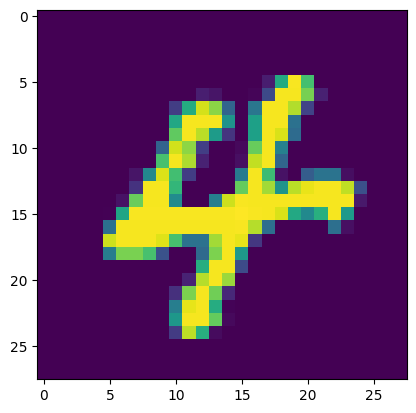

In [18]:
plt.imshow(X_train[0][:,:,0])
print(y_train_enc[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


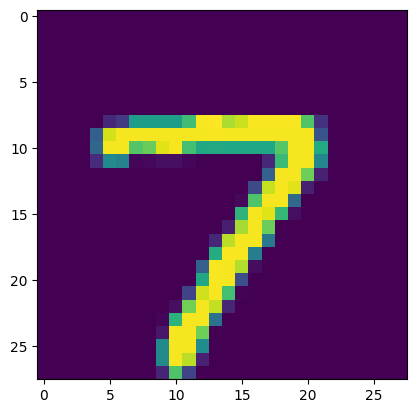

In [19]:
plt.imshow(X_train[9][:,:,0])
print(y_train_enc[9])

That looks correct. Now we will move on to the architecture of the CNN

### Architecture of CNNs
A typical CNN architecture follows a pattern of alternating convolutional and pooling layers, followed by one or more fully connected layers. Here's a simple example:

1. Input Layer: Raw image data, e.g., 32x32 RGB image.
2. Convolutional Layer: Applies several filters to the input image, producing feature maps.
3. ReLU Activation: Applies the ReLU function to introduce non-linearity.
4. Pooling Layer: Reduces the spatial dimensions of the feature maps.
5. Convolutional Layer: Applies more filters to capture more complex features.
6. ReLU Activation: Applies ReLU function.
7. Pooling Layer: Further reduces the spatial dimensions.
8. Fully Connected Layer: High-level reasoning with all-to-all connections.
9. Output Layer: Produces the final output, e.g., class probabilities in image classification.

### Let us implement this Architecture
1. Input Layer: 28x28 grayscale images.
2. Convolution + ReLU: 32 filters of 3x3, output size 26x26x32.
3. Max Pooling: Reduces size to 13x13x32.
4. Convolution + ReLU: 64 filters of 3x3, output size 11x11x64.
5. Max Pooling: Reduces size to 5x5x64.
6. Flatten: Converts 5x5x64 to 1600.
7. Dense + ReLU: 128 neurons.
8. Dropout: 20% dropout.
9. Dense + ReLU: 64 neurons.
10. Dropout: 20% dropout.
11. Output: 10 neurons with softmax.

Before proceeding, let's understand some terms:

#### Filters in CNNs
Filters (or kernels) are small matrices used in convolution operations. They slide over the input data to extract features such as edges, textures, or more complex patterns as we go deeper into the network.

- Key Points:
    - Size: Filters have a specific size, commonly 3x3, 5x5, etc.
    - Number: The number of filters in a layer determines the depth of the output feature map.
    - Operation: Each filter convolves with the input image or the output from the previous layer, producing a feature map that highlights certain features detected by the filter.

#### Flatten Layer
The Flatten layer is used to convert the multidimensional output of convolutional and pooling layers into a one-dimensional vector, making it suitable for input into fully connected (dense) layers.

- Key Points:
    - Conversion: Transforms a 3D tensor (e.g., 5x5x64) into a 1D vector (e.g., 1600).
    - Purpose: Prepares data for the dense layers, which require 1D input.

#### Dropout Layer
Dropout is a regularization technique used to prevent overfitting in neural networks. During training, it randomly sets a fraction of input units to zero at each update. This helps the network to become less sensitive to the specific weights of individual neurons, promoting generalization.

- Key Points:
    - Dropout Rate: The fraction of input units to drop, specified as a parameter (e.g., 0.2 means 20% of the inputs are dropped).
    - Training vs. Inference: Dropout is applied only during training, not during inference (testing).

In [20]:
# sequential model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [21]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
"""
32 filters of size 3x3 are applied to the input image.
Each filter detects different features in the input data.
The result is 32 feature maps, each corresponding to a filter.
"""
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
"""
If the previous layer's output is of shape (5, 5, 64), the Flatten layer will convert it to a shape of (1600).
"""

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
"""
20% dropout: Randomly sets 20% of the input units to zero during each update step in training.
Purpose: Helps prevent the model from overfitting by introducing noise during training
"""

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

Now, let us compile the model, and see the the summary

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

Wow, that is a lot of parameters, this model may take a while to train, let us fit the model to our training data and use the validation data too

In [23]:
history = model.fit(X_train, y_train_enc, epochs=10, validation_data=(X_val, y_val_enc), batch_size=128) # batch_size is the number of samples per gradient update

Epoch 1/10
110/110 [==============================] - 10s 82ms/step - loss: 0.7576 - accuracy: 0.7568 - val_loss: 0.1693 - val_accuracy: 0.9493
Epoch 2/10
110/110 [==============================] - 8s 77ms/step - loss: 0.1957 - accuracy: 0.9429 - val_loss: 0.1135 - val_accuracy: 0.9645
Epoch 3/10
110/110 [==============================] - 8s 74ms/step - loss: 0.1329 - accuracy: 0.9594 - val_loss: 0.0835 - val_accuracy: 0.9762
Epoch 4/10
110/110 [==============================] - 9s 82ms/step - loss: 0.1005 - accuracy: 0.9690 - val_loss: 0.0857 - val_accuracy: 0.9725
Epoch 5/10
110/110 [==============================] - 8s 74ms/step - loss: 0.0791 - accuracy: 0.9764 - val_loss: 0.0654 - val_accuracy: 0.9802
Epoch 6/10
110/110 [==============================] - 8s 74ms/step - loss: 0.0643 - accuracy: 0.9798 - val_loss: 0.0847 - val_accuracy: 0.9765
Epoch 7/10
110/110 [==============================] - 8s 77ms/step - loss: 0.0536 - accuracy: 0.9837 - val_loss: 0.0616 - val_accuracy: 0.982

Cool, training is done, let us look at the loss and accuracy during training. This was returned to the ``history`` variable

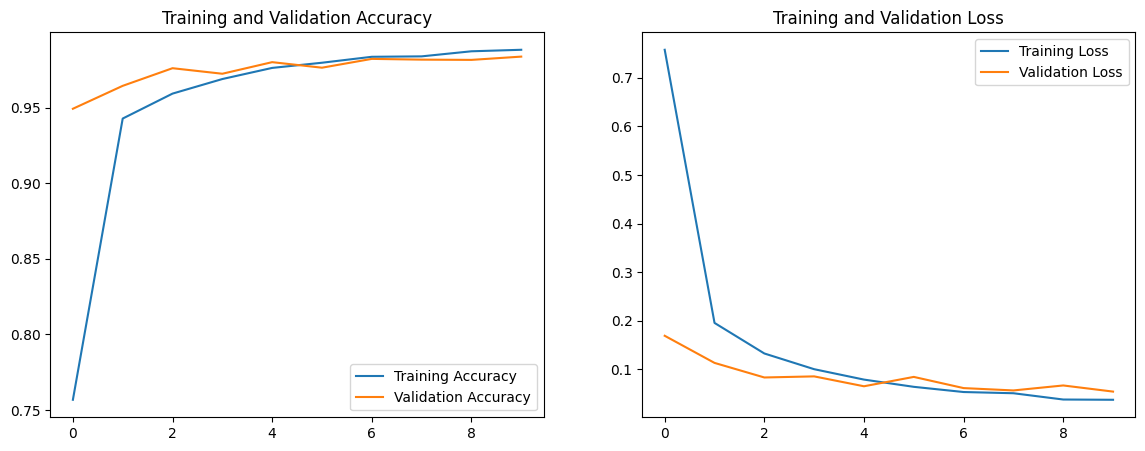

In [24]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

Finally let, us look at some metrics like accuracy, recall and f1-score

In [25]:
# model performance metrics
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
# model loss and accuracy on validation set
model.evaluate(X_val, y_val_enc, verbose=False) # verbose=False will not show the progress bar

[0.05444631353020668, 0.9838333129882812]

The first value is the loss and the second is the accuracy on the validation set

Now, lets make predictions on the valdation set and see how many it got wrong and how many are right

In [27]:
# predicted values
y_pred_enc = model.predict(X_val)

# actual
y_act = [np.argmax(i) for i in y_val_enc]

# decoding predicted values
y_pred = [np.argmax(i) for i in y_pred_enc] # argmax returns the indices of the maximum values along an axis

print(y_pred_enc[0])
print(y_pred[0])

188/188 [==============================] - 2s 7ms/step
[1.3999904e-10 2.6043136e-08 5.2253267e-08 2.2700890e-08 9.4809127e-10
 2.9386896e-11 1.3242088e-13 9.9999893e-01 7.4144790e-10 1.0668795e-06]
7


The numbers in the list represent the confidence for each class, you can see that class 7 has the highest confidence of about 99%

In [28]:
print(classification_report(y_act, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       574
           1       0.98      0.99      0.99       646
           2       0.98      0.98      0.98       599
           3       0.99      0.97      0.98       619
           4       0.98      0.99      0.98       575
           5       0.98      0.98      0.98       573
           6       0.98      0.99      0.99       598
           7       0.97      0.99      0.98       624
           8       0.99      0.98      0.98       590
           9       0.99      0.98      0.98       602

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000



Scores close to 1 are deemed good

Finally, let us look at a confusion matrix. all the off-diagonal cells are where actual class != predicted class. We can see that most of the samples were classified correctly

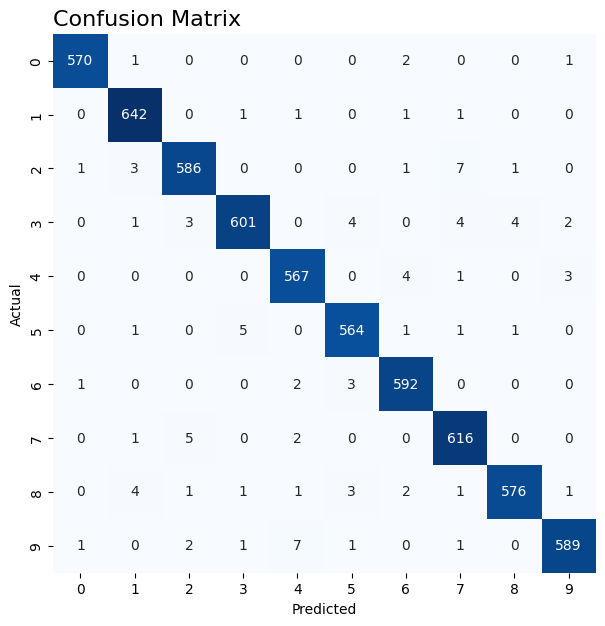

In [30]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusion_matrix(y_act, y_pred), annot=True, 
            cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix', loc='left', fontsize=16)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

Now, let us load in the test dataset and see how it does on that, remember to preprocess the data like we did for training

In [31]:
test_data = pd.read_csv("datasets/mnist_test.csv", header = None)
test_data.columns = column_headers
test_data.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# split into image and labels and convert to numpy array
X_test = test_data.iloc[:, 1:].to_numpy()
y_test = test_data['label'].to_numpy()

print(X_test.shape, y_test.shape)

(10000, 784) (10000,)


In [33]:
X_test = X_test / 255.0

In [34]:
# reshape the dataframe to 3x3 matrix with 1 channel grey scale values
X_test = X_test.reshape(-1,28,28,1)

# shape of testing dataset
print(X_test.shape)

(10000, 28, 28, 1)


In [36]:
# predicted values
y_pred_enc = model.predict(X_test)

# decoding predicted values
y_pred = [np.argmax(i) for i in y_pred_enc]

print(y_pred_enc[0])
print(y_pred[0])

313/313 [==============================] - 2s 7ms/step
[6.3312727e-10 1.3190724e-09 2.0806695e-07 9.3413577e-10 5.6384664e-11
 1.4115874e-11 2.1343216e-13 9.9999964e-01 1.1771269e-10 9.2927102e-08]
7


Lets visualize the actual image and the predicted outcome

C:\Users\trail\AppData\Local\Temp\ipykernel_22016\2334307217.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 5, ind+1)


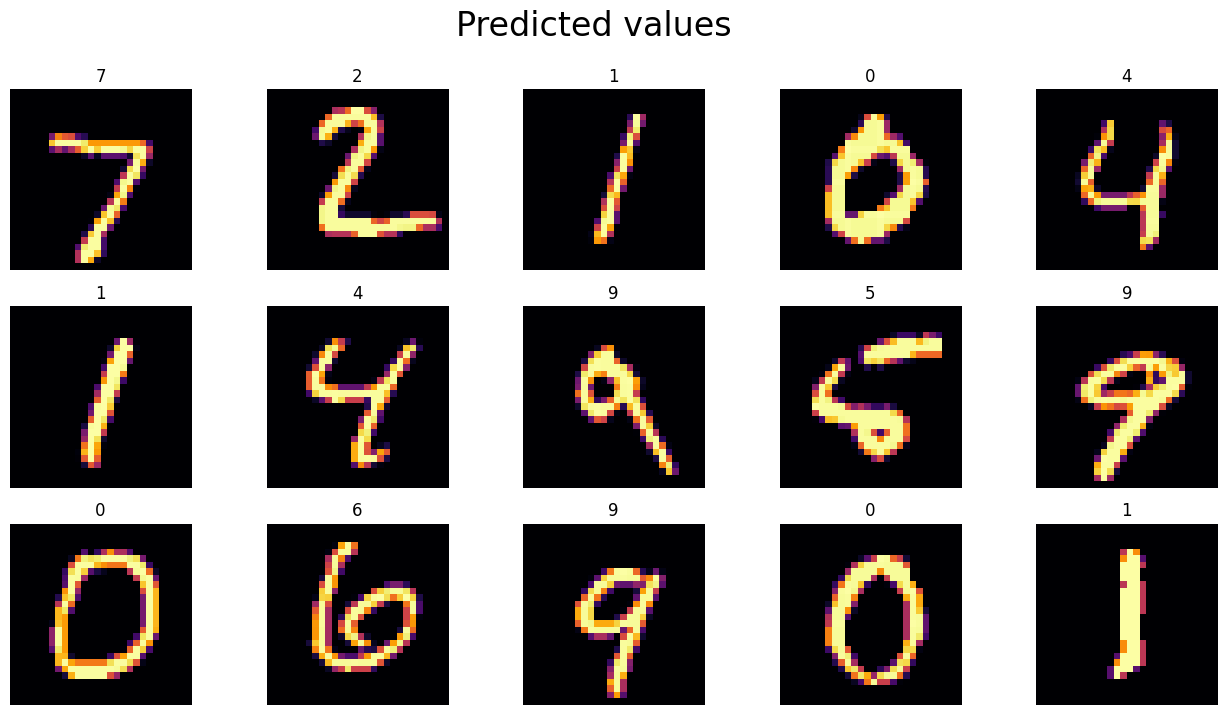

In [37]:
# predicted targets of each images
# (labels above the images are predicted labels)
fig, ax = plt.subplots(figsize=(16, 8))
for ind, row in enumerate(X_test[:15]):
    plt.subplot(3, 5, ind+1)
    plt.title(y_pred[ind])
    img = row.reshape(28, 28)
    fig.suptitle('Predicted values', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='inferno')

Congratulations! you have made a CNN model that can classify handwritten digits